In [1]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager,rc
from matplotlib import rcParams


In [2]:
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
plt.rcParams['font.size'] = 14
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

In [3]:
mart_df=pd.read_csv('./mart2.csv',encoding='utf-8')

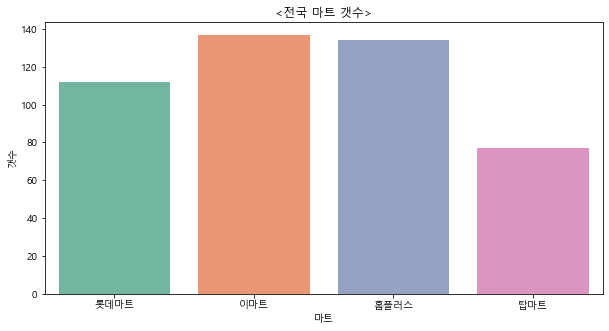

In [5]:

plt.figure(figsize=(10,5))
sns.color_palette("Pastel2")
p=sns.countplot(data=mart_df,x='brand',palette='Set2')
p.set_title('<전국 마트 갯수>')
p.set_xlabel('마트')
p.set_ylabel('갯수')
plt.show()


In [6]:
mart_df.head()

,brand,store,address,Latitude,Longitude,tel
0,롯데마트,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500
1,롯데마트,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750
2,롯데마트,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500
3,롯데마트,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500
4,롯데마트,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500


In [7]:
mart_df['city']=mart_df['address'].str.split().str[0]

In [8]:
mart_df.head()

,brand,store,address,Latitude,Longitude,tel,city
0,롯데마트,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500,부산광역시
1,롯데마트,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750,경기도
2,롯데마트,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500,경기도
3,롯데마트,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500,서울특별시
4,롯데마트,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500,경상남도


In [9]:
mart_df_1=mart_df.groupby(["brand", "city"])["city"].count()

In [10]:
mart_df_1=mart_df_1.reset_index(name='count')
mart_df_1.head()

,brand,city,count
0,롯데마트,강원도,3
1,롯데마트,경기도,30
2,롯데마트,경상남도,12
3,롯데마트,경상북도,3
4,롯데마트,광주광역시,4


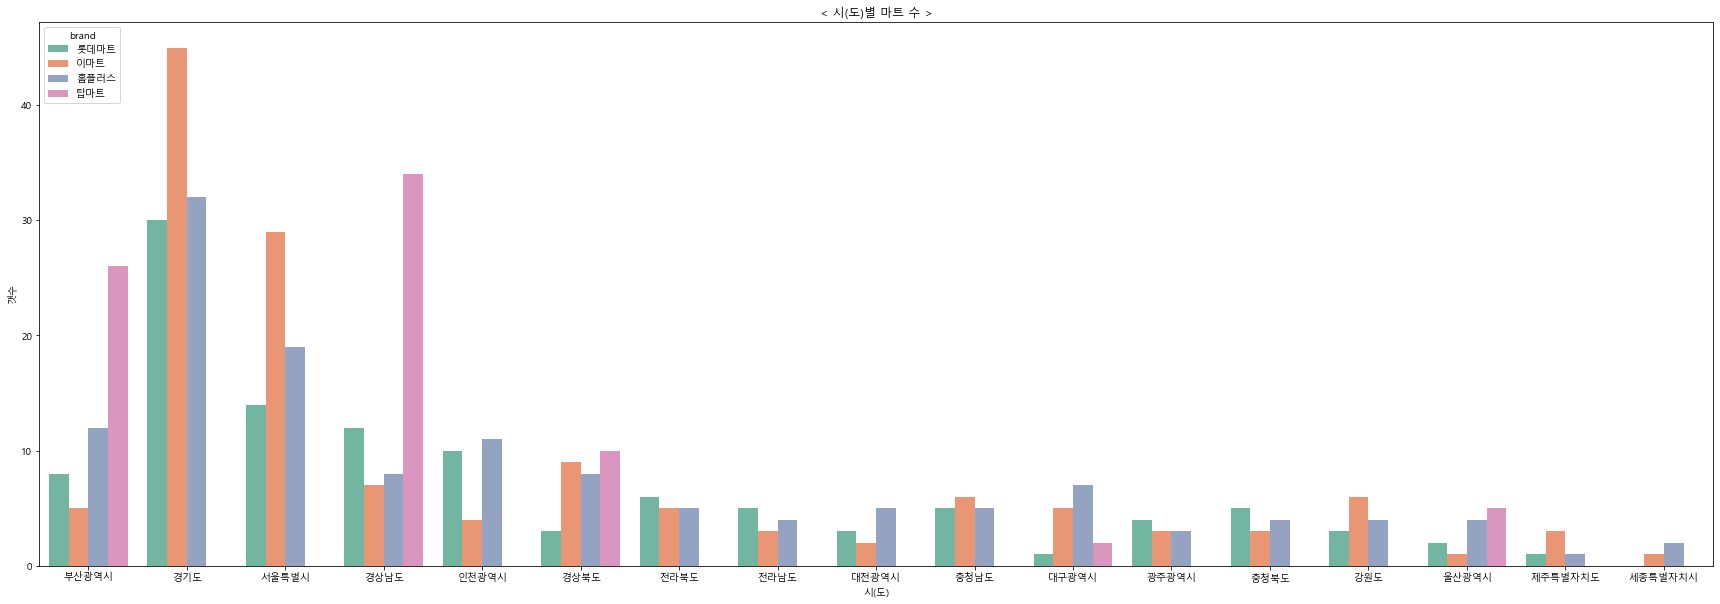

In [11]:

plt.figure(figsize=(30, 10))
p1=sns.countplot(data=mart_df,x='city', hue='brand', palette='Set2')
p1.set_title('< 시(도)별 마트 수 >')
p1.set_xlabel('시(도)')
p1.set_ylabel('갯수')
plt.show()

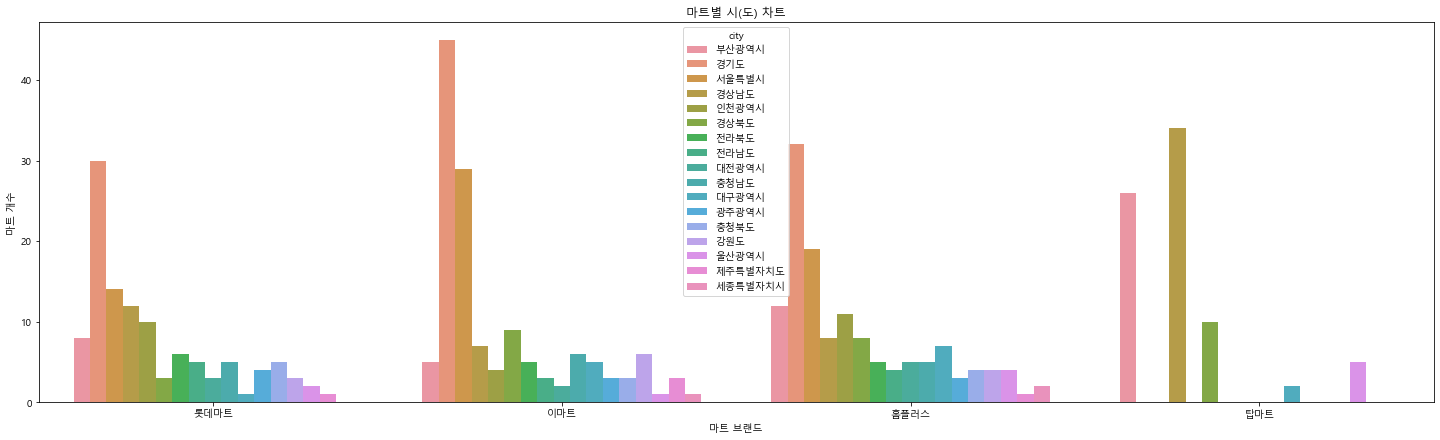

In [16]:
# 시도-마트브랜드 갯수 확인 그래프
plt.figure(figsize=(25, 7))
chart2 = sns.countplot(data=mart_df,x='brand', hue='city')
chart2.set_title('마트별 시(도) 차트')
chart2.set_xlabel('마트 브랜드')
chart2.set_ylabel('마트 개수')
plt.show()

In [12]:


category_names = ['롯데마트', '이마트', '탑마트', '홈플러스']
results = {
    '강원도': [3,6,0,4],
    '경기도': [30,45,0,32],
    '경상남도': [12,7,34,8],
    '경상북도': [3,9,10,8],
    '광주광역시': [4,3,0,3],
    '대구광역시': [1,5,2,7],
    '대전광역시': [3,2,0,5],
    '부산광역시': [8,5,26,12],
    '서울특별시': [14,29,0,19],
    '세종특별자치시': [0,1,0,2],
    '울산광역시': [2,1,5,4],
    '전라남도': [5,3,0,4],
    '전라북도': [6,5,0,5],
    '제주특별자치도': [1,3,0,1],
    '충청남도': [5,6,0,5],
    '충청북도': [5,3,0,4], 
    
}

In [13]:
def zero_to_nan(values):
     """Replace every 0 with 'nan' and return a copy."""
     return [float('nan') if x==0 else x for x in values]

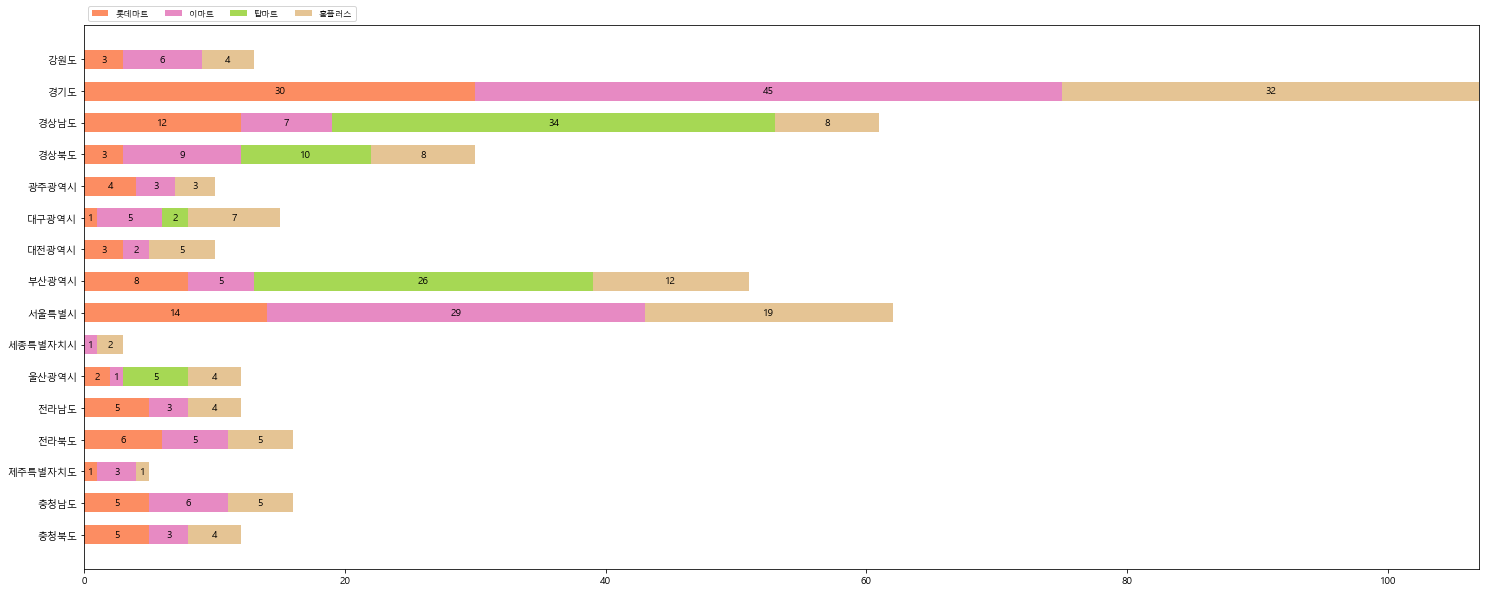

In [14]:
def mart(count, brand):    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['Set2'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(25, 10))
    ax.invert_yaxis()
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, zero_to_nan(widths), left=starts, height=0.6,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' 
        ax.bar_label(container=rects, label_type='center', color=text_color, fmt='%d')
        ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
            loc='lower left', fontsize='small')

    return fig, ax


mart(results, category_names)
plt.show()

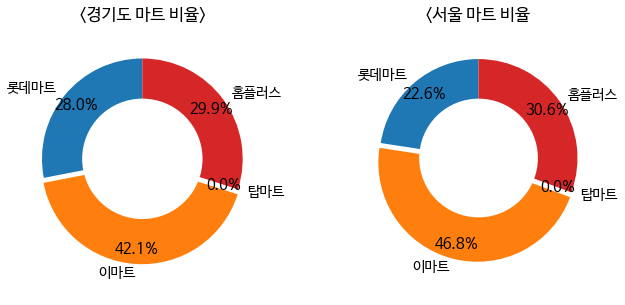

In [117]:
if __name__=='__main__':
	#### 1. pie plot으로 나타낼 데이터 입력
	
	labels = ['롯데마트', '이마트', '탑마트', '홈플러스']
	titles = ['<경기도 마트 비율>', '<서울 마트 비율','부산 마트 비율>']
	colors = ['Set2']
	data   = [[30, 45,0, 32], # 경기도
	          [ 14,29,0,19]] # 서울
		
	fig, axes = plt.subplots(1,2,figsize=(10,5),facecolor='white')
	plt.subplots_adjust(wspace=0.5) # subplot간의 너비 간격 조절
	
	
	explode = (0, 0.05, 0, 0) # 퍼짐 정도 조절
	for i in range(2):
		ax = axes[i] # subplot 선택
		wedges, texts, autotexts = ax.pie(data[i], explode=explode, labels=labels,
		                                  autopct='%1.1f%%', pctdistance=0.85,
		                                  shadow=False, startangle=90)
		for w in wedges: # 조각 설정
			w.set_linewidth(0)
			w.set_edgecolor('white')
			
		for t in texts: # label 설정
			t.set_color('black')
			t.set_fontsize(14)
			
		for a in autotexts: # 퍼센티지 설정
			a.set_color('black')
			a.set_fontsize(15)
		'''
		NOTE. 아래의 2줄은 파이차트를 도넛차트로 보이게끔 하는 trick임
		'''
		centre_circle = plt.Circle((0,0), 0.6, color='white', fc='white', linewidth=0)
		ax.add_artist(centre_circle)
		
		ax.set_title(titles[i])
		ax.axis('equal')
	
	# plt.savefig('ex_pieplot.png', format='png', dpi=300)
	plt.show()

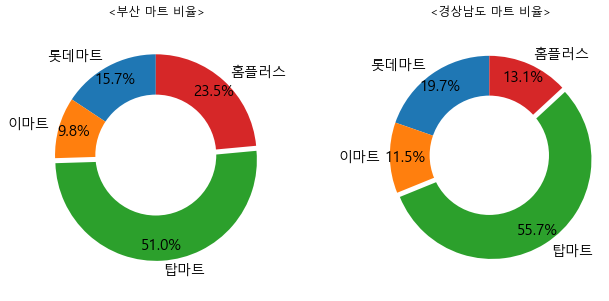

In [15]:
if __name__=='__main__':
	#### 1. pie plot으로 나타낼 데이터 입력
	
	labels = ['롯데마트', '이마트', '탑마트', '홈플러스']
	titles = ['<부산 마트 비율>', '<경상남도 마트 비율>']
	colors = ['Set2']
	data   = [[8,5,26,12], # 부산
	          [12,7,34,8]]  # 경상남도
	
	fig, axes = plt.subplots(1,2,figsize=(10,5),facecolor='white')
	plt.subplots_adjust(wspace=0.5) # subplot간의 너비 간격 조절
	
	
	explode = (0, 0, 0.05, 0) # 퍼짐 정도 조절
	for i in range(2):
		ax = axes[i] 
		wedges, texts, autotexts = ax.pie(data[i], explode=explode, labels=labels,
		                                  autopct='%1.1f%%', pctdistance=0.85,
		                                  shadow=False, startangle=90)
		for w in wedges: # 조각 설정
			w.set_linewidth(0)
			w.set_edgecolor('white')
			
		for t in texts: # label 설정
			t.set_color('black')
			t.set_fontsize(14)
			
		for a in autotexts: # 퍼센티지 설정
			a.set_color('black')
			a.set_fontsize(15)
		'''
		NOTE. 아래의 2줄은 파이차트를 도넛차트로 보이게끔 하는 trick임
		'''
		centre_circle = plt.Circle((0,0), 0.6, color='white', fc='white', linewidth=0)
		ax.add_artist(centre_circle)
		
		ax.set_title(titles[i])
		ax.axis('equal')
		
	# plt.savefig('ex_pieplot.png', format='png', dpi=300)
	plt.show()

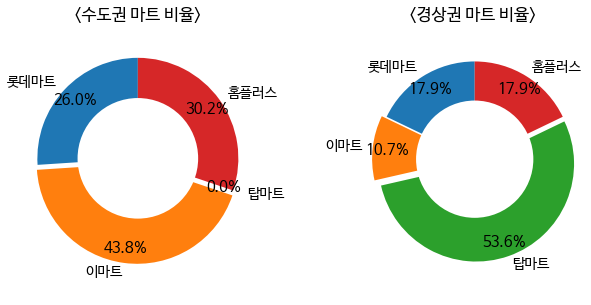

In [115]:
if __name__=='__main__':
	#### 1. pie plot으로 나타낼 데이터 입력
	
	labels = ['롯데마트', '이마트', '탑마트', '홈플러스']
	titles = ['<수도권 마트 비율>', '<경상권 마트 비율>']
	colors = ['Set2']
	data   = [[44,74,0,51], # 수도권
	          [20,12,60,20]]  # 경상권
	
	fig, axes = plt.subplots(1,2,figsize=(10,5),facecolor='white')
	plt.subplots_adjust(wspace=0.5) # subplot간의 너비 간격 조절
	
	
	explode = (0, 0.05, 0.05, 0) # 퍼짐 정도 조절
	for i in range(2):
		ax = axes[i] 
		wedges, texts, autotexts = ax.pie(data[i], explode=explode, labels=labels,
		                                  autopct='%1.1f%%', pctdistance=0.85,
		                                  shadow=False, startangle=90)
		for w in wedges: # 조각 설정
			w.set_linewidth(0)
			w.set_edgecolor('white')
			
		for t in texts: # label 설정
			t.set_color('black')
			t.set_fontsize(14)
			
		for a in autotexts: # 퍼센티지 설정
			a.set_color('black')
			a.set_fontsize(15)
		'''
		NOTE. 아래의 2줄은 파이차트를 도넛차트로 보이게끔 하는 trick임
		'''
		centre_circle = plt.Circle((0,0), 0.6, color='white', fc='white', linewidth=0)
		ax.add_artist(centre_circle)
		
		ax.set_title(titles[i])
		ax.axis('equal')
		
	# plt.savefig('ex_pieplot.png', format='png', dpi=300)
	plt.show()